<a href="https://colab.research.google.com/github/james-monahan/Stats_Calc_Workshop/blob/main/Math_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import linear_model
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

###Two arrays, determine if sample means are equivalent.  

###Null hypothesis: Means are equal.  

###Reject Null if p-value is less than 0.05

In [8]:
samples_a = np.random.normal(size=20)
samples_b = np.random.normal(0.2, 1, size=20)


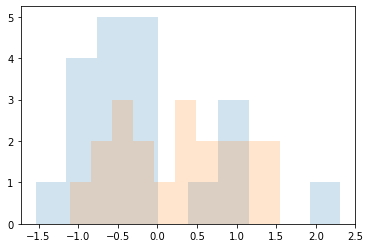

In [9]:
plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [13]:
scipy.stats.ttest_ind(samples_a, samples_b).pvalue

0.13119485647313064

In [48]:
#increase sample size
samples_a = np.random.normal(size=100)
samples_b = np.random.normal(0.2, 1, size=100)
scipy.stats.ttest_ind(samples_a, samples_b).pvalue

0.0011286014278991754

###Find correlations and determine if same mean

In [21]:
sample_data = "https://raw.githubusercontent.com/PacktWorkshops/The-Statistics-and-Calculus-with-Python-Workshop/master/Chapter03/Exercise3.04/data.csv"

In [22]:
df = pd.read_csv(sample_data)

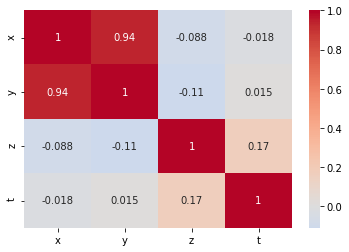

In [29]:
sns.heatmap(df.corr(), center=0, cmap='coolwarm', annot=True)

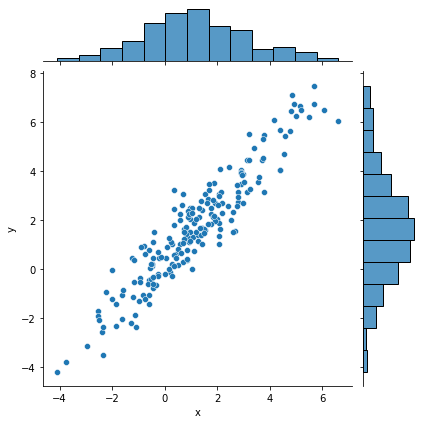

In [30]:
sns.jointplot(x='x', y='y', data=df)

In [33]:
#p-value indicates rejecting null: correlated, but different means
scipy.stats.ttest_ind(df['x'], df['y'])

Ttest_indResult(statistic=-2.540872624099008, pvalue=0.011436482008949079)

###Linear model in sklearn

In [35]:
model = linear_model.LinearRegression()
model.fit(df[['x', 'z']], df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
model.coef_, model.intercept_

(array([ 1.06862616, -0.23163518]), 1.2706765376568219)

In [43]:
df[0:1]

,x,y,z,t
0,0.10861,0.901637,3.495175,5.548247


In [45]:
model.predict([[df.x[0],df.z[0]]])

array([0.57713436])

###Model selection

In [49]:
n_samples = 10000
centers = [(-2, 2), (0, 0), (2, 2)]
X, y = make_blobs(n_samples=n_samples, centers=centers, \
                  shuffle=False, random_state=0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


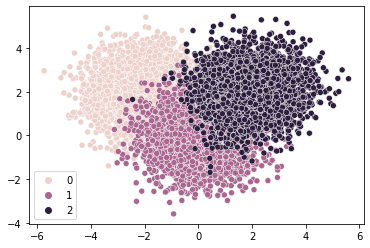

In [61]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.show()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=0)

In [63]:
models = [KNeighborsClassifier(), SVC(),GradientBoostingClassifier()]

In [67]:
for model in models:    
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
 
  print(f'{type(model).__name__}: {accuracy_score(y_pred, y_test)}')

KNeighborsClassifier: 0.8792
SVC: 0.8952
GradientBoostingClassifier: 0.8876
